# EDA and Model training on Moscow Housing Price Dataset

In [1]:
#Loading the necessary libraries needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Importing the dataset required for this project and then printing the first five rows
df = pd.read_csv("C:/Users/HP/Desktop/Projects/Datasets/data.csv")
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


# A concise summary of this dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


# Data cleaning 

### Converting cols that possess categorical features but not a categorical datatype to categorical datatype

#### Apartment type column

In [4]:
df["Apartment type"].unique()

array(['Secondary', 'New building'], dtype=object)

In [5]:
df["Apartment type"] = df["Apartment type"].astype("category")

In [6]:
df["Apartment type"].cat.categories

Index(['New building', 'Secondary'], dtype='object')

#### Renovation Column

In [7]:
df["Renovation"].unique()

array(['Cosmetic', 'European-style renovation', 'Without renovation',
       'Designer'], dtype=object)

In [8]:
df["Renovation"] = df["Renovation"].astype("category")

In [9]:
df["Renovation"].cat.categories

Index(['Cosmetic', 'Designer', 'European-style renovation',
       'Without renovation'],
      dtype='object')

#### Region column

In [10]:
df["Region"].unique()

array(['Moscow region', 'Moscow'], dtype=object)

In [11]:
df["Region"] = df["Region"].astype("category")

In [12]:
df["Region"].cat.categories

Index(['Moscow', 'Moscow region'], dtype='object')

# Checking for missing values in this dataset

In [13]:
df.isna().sum().sort_values()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

# Handling Outliers

In [14]:
df["Price"].describe()

count    2.267600e+04
mean     3.612132e+07
std      8.282561e+07
min      1.150000e+06
25%      7.068116e+06
50%      1.134320e+07
75%      2.479925e+07
max      2.455020e+09
Name: Price, dtype: float64

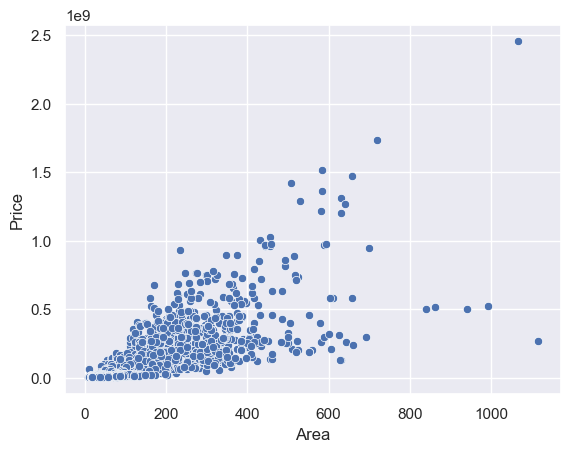

In [15]:
sns.scatterplot(
    x = "Area",
    y = "Price",
    data = df
)
plt.show()

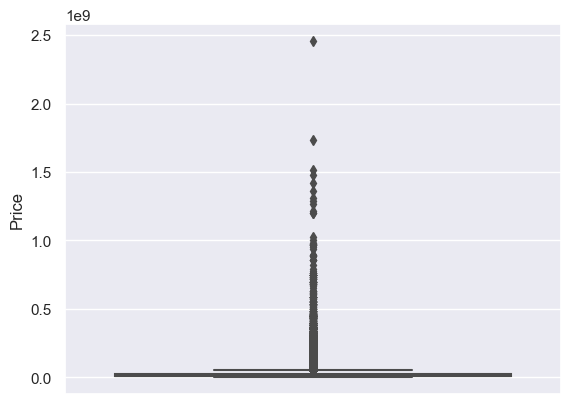

In [16]:
sns.boxplot(
    y = "Price",
    data = df
)
plt.show()

In [17]:
df_free_out = df[df["Price"] <= 2.479925e+08]

In [18]:
df_free_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22059 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             22059 non-null  float64 
 1   Apartment type    22059 non-null  category
 2   Metro station     22059 non-null  object  
 3   Minutes to metro  22059 non-null  float64 
 4   Region            22059 non-null  category
 5   Number of rooms   22059 non-null  float64 
 6   Area              22059 non-null  float64 
 7   Living area       22059 non-null  float64 
 8   Kitchen area      22059 non-null  float64 
 9   Floor             22059 non-null  float64 
 10  Number of floors  22059 non-null  int64   
 11  Renovation        22059 non-null  category
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 1.7+ MB


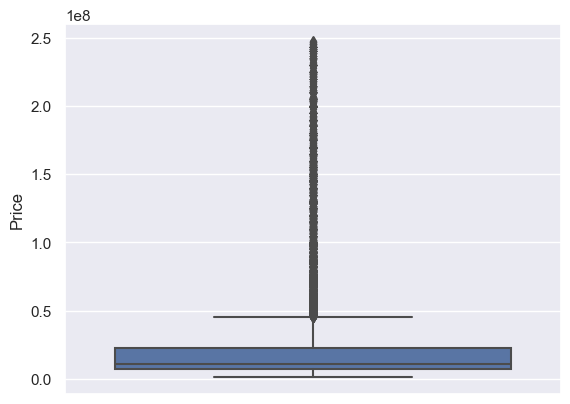

In [19]:
sns.boxplot(
    y = "Price",
    data = df_free_out
)
plt.show()

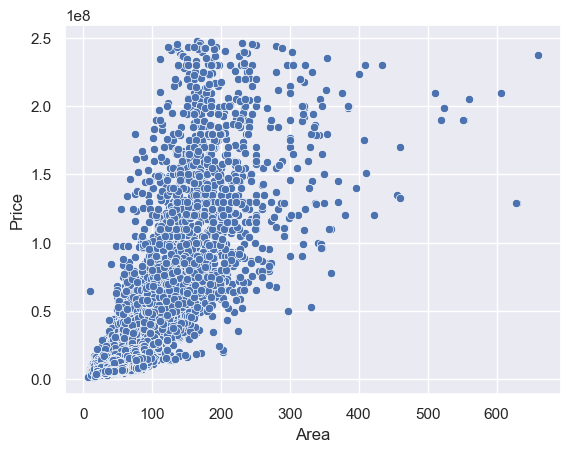

In [20]:
sns.scatterplot(
    x = "Area",
    y = "Price",
    data = df_free_out)
plt.show()

# Answering some questions asked by the publisher of the dataset

## What are the most common types of apartments in the region?

In [21]:
count = df_free_out.groupby("Region")["Apartment type"].value_counts()
count

Region                     
Moscow         Secondary       11883
               New building     3613
Moscow region  New building     5911
               Secondary         652
Name: Apartment type, dtype: int64

In [22]:
count = df_free_out.groupby("Region")["Apartment type"].value_counts(normalize = True)*100
count

Region                     
Moscow         Secondary       76.684306
               New building    23.315694
Moscow region  New building    90.065519
               Secondary        9.934481
Name: Apartment type, dtype: float64

# Data visualization on distribution of the apartment types in all regions

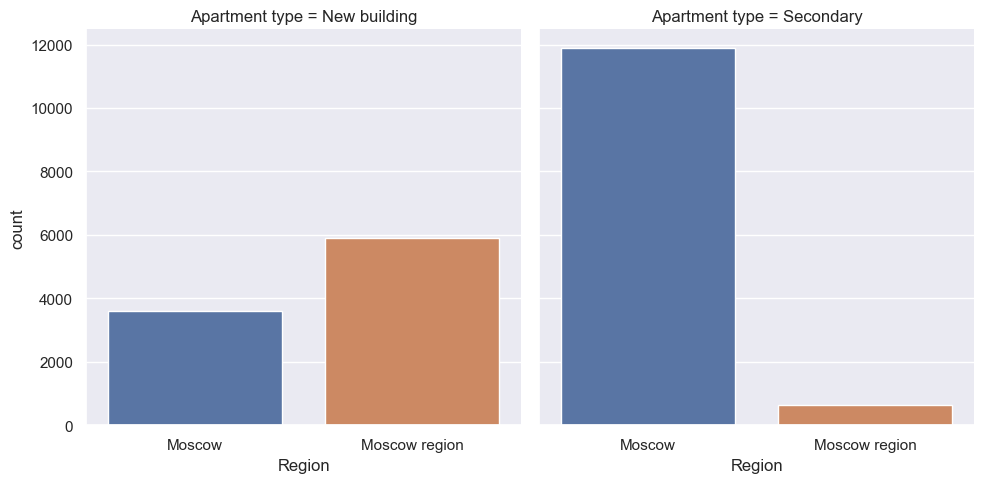

In [23]:
sns.catplot(
    x = "Region",
    kind = "count",
    col = "Apartment type",
    data = df_free_out,
    col_wrap = 2
)
plt.show()

Results drawn from analysing the moscow housing dataset shows that; 

1. In the Moscow region the "secondary apartment" has the most common apartment type   

2. While in the Moscow oblast region the "New building" is the most common apartment type 

## Is there a relationship between housing prices and proximity to metro stations?

In [24]:
corr_price_m2metro = df_free_out["Price"].corr(df_free_out["Minutes to metro"])
print(f"The correlation between Housing prices and Metro stations is: {corr_price_m2metro}")

The correlation between Housing prices and Metro stations is: -0.11118324652945376


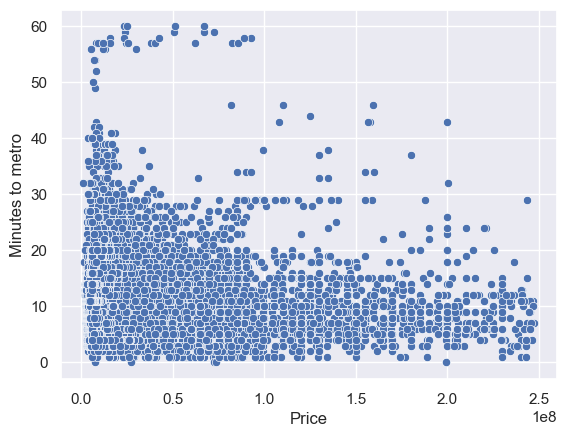

In [25]:
sns.scatterplot(
    data = df_free_out,
    x = "Price",
    y = "Minutes to metro"
)
plt.show()

The correlation statistical analysis and scatter plot data visualization shows a negative correlation   
which means that there is no relationship between housing prices and proximity to metro stations

# How does the level of renovation affect the price of an apartment?

In [26]:
df_free_out.groupby("Renovation")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Renovation,,,,,,,,
Cosmetic,12788.0,9.634695e+06,7.697440e+06,1750000.0,5966780.5,8150000.0,11285950.0,225000000.0
Designer,2663.0,7.376989e+07,6.242595e+07,3147000.0,18700000.0,56000000.0,115000000.0,247500000.0
European-style renovation,3603.0,2.901078e+07,3.407985e+07,2650000.0,12300000.0,19499000.0,28900000.0,245500000.0
Without renovation,3005.0,4.526239e+07,4.712116e+07,1150000.0,13500000.0,30800000.0,55000000.0,246621277.0


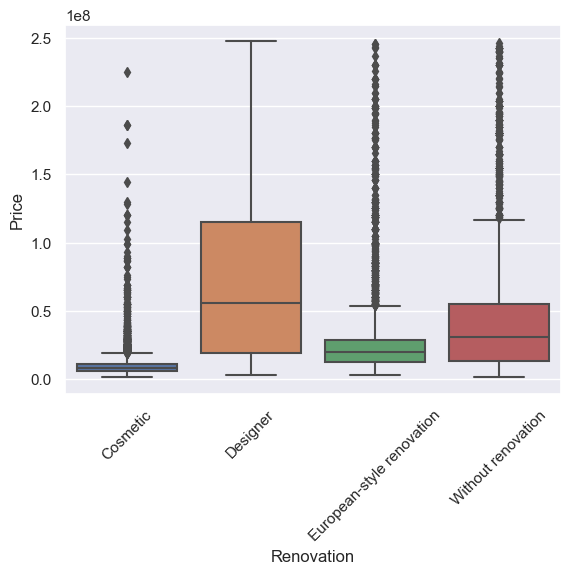

In [27]:
sns.boxplot(
    x = "Renovation",
    y = "Price",
    data = df_free_out
)
plt.xticks(rotation  = 45)
plt.show()

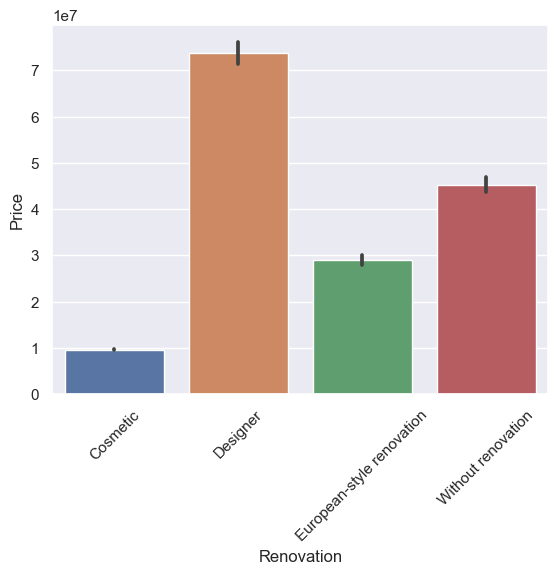

In [28]:
sns.barplot(
    x = "Renovation",
    y = "Price",
    data = df_free_out
)
plt.xticks(rotation  = 45)
plt.show()

Results drawn from analyzing the Moscow housing dataset shows thah;

1. Apartments with designer renovation style has the most expensive prices among all other apartment renovation syles

2. Apartments without any renovation style comes second to the designer renovation style

3. Apartments with the European-style renovations comes third the price rating

4. last and the least are apartments with the Cosmetic renovations

# Is there a price difference in housing between Moscow and the Moscow Oblast region?

In [29]:
df_free_out.groupby("Region")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Moscow,15496.0,3.318713e+07,4.356881e+07,1150000.0,9979365.0,15300000.0,34069243.75,247500000.0
Moscow region,6563.0,6.998220e+06,2.789919e+06,1939125.0,5304380.5,6546779.0,8076780.00,53000000.0


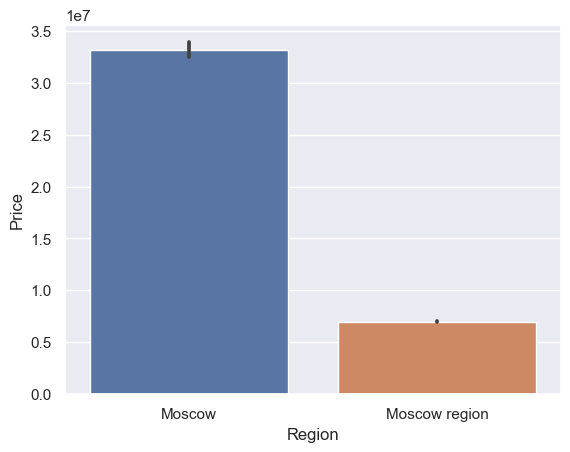

In [30]:
sns.barplot(
    x = "Region",
    y = "Price",
    data = df_free_out
)
plt.show()

Yes there is a huge price difference in housing between Moscow and the Moscow Oblast region


# Which factors have the greatest impact on housing price

# Are there any preferences regarding floor levels?

#### couldn't answer the two  questions aboves but i will really appreiciate if you can guide and put me through on how i can answer this question

In [31]:
x = df_free_out[["Minutes to metro", "Number of rooms", "Area", "Living area", "Kitchen area", "Floor", "Number of floors"]].values
y = df_free_out["Price"].values

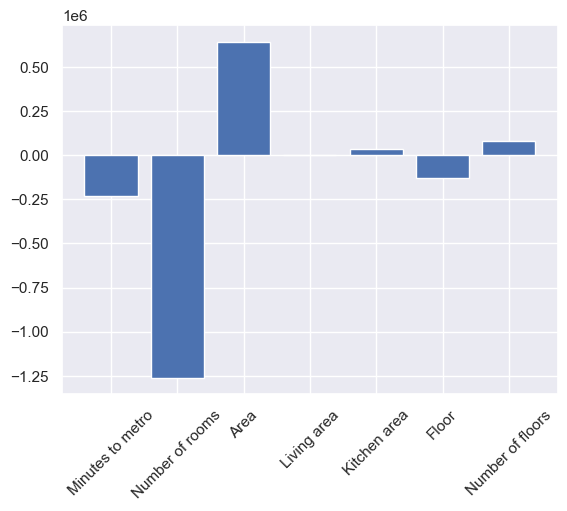

In [32]:
from sklearn.linear_model import Lasso
names = df_free_out[["Minutes to metro", "Number of rooms", "Area", "Living area", "Kitchen area", "Floor", "Number of floors"]].columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(x, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

# Training Model

In [33]:
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
scaler = StandardScaler()

In [35]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [36]:
scale_train = scaler.fit_transform(x_train)

In [37]:
scale_test = scaler.transform(x_test)

In [38]:
lasso = Lasso(alpha = 0.1)

In [39]:
lasso.fit(scale_train, y_train)

Lasso(alpha=0.1)

In [40]:
y_predl = lasso.predict(scale_test)

In [41]:
lasso.score(scale_test, y_test)

0.6677345018413353

In [42]:
mean_squared_error(y_test, y_predl)

512397262020878.56

In [43]:
lmodel = LinearRegression()

In [44]:
lmodel.fit(scale_train, y_train )

LinearRegression()

In [45]:
y_pred = lmodel.predict(scale_test)

In [46]:
lmodel.score(scale_test, y_test)

0.66773450178333

In [47]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"The Root mean squared error of the linear regression model above is {rmse}")

The Root mean squared error of the linear regression model above is 22636193.631225422


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [74]:
dt = DecisionTreeRegressor(
    max_depth = 17,
    random_state = 42
    )

In [75]:
dt.fit(scale_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=42)

In [76]:
y_preddt = dt.predict(x_test)

In [1]:
rmse = mean_squared_error(y_test, y_preddt, squared = False)
rmse

NameError: name 'mean_squared_error' is not defined

In [85]:
mse_score = {}
max_depths = np.arange(1,266)
for depths in max_depths:
    dt = DecisionTreeRegressor(
    max_depth = depths,
    random_state = 42
    )
    dt.fit(scale_train, y_train)
    y_preddt = dt.predict(x_test)
    mse_score[depths] = mean_squared_error(y_test, y_preddt, squared = False)
print(mse_score.min())

AttributeError: 'dict' object has no attribute 'min'

In [54]:
2.455020 * 10 **7

24550200.000000004